In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
col_names = ['age', 'gender', 'SBP', 'DBP', 'diabetes', 'heart_diseases', 'F_H_stroke', 'alcoholic', 'Phy_active','smoking','depression','S_fat_up','fibre_dwn','CKD_kidney','cl_attribute']
# load dataset
stroke = pd.read_csv("thesis_data_du.csv", header=None, names=col_names)

In [3]:
stroke.head(5)

,age,gender,SBP,DBP,diabetes,heart_diseases,F_H_stroke,alcoholic,Phy_active,smoking,depression,S_fat_up,fibre_dwn,CKD_kidney,cl_attribute
0,55,1,140,85,1,0,0,0,0,0,1,0,0,0,1
1,53,1,120,85,0,0,1,0,0,0,1,0,0,0,1
2,49,1,120,85,0,0,1,0,0,0,1,0,0,0,0
3,48,0,120,85,0,0,1,0,0,0,1,0,0,0,1
4,47,0,130,85,1,0,1,0,0,1,1,0,0,0,1


In [4]:
#split dataset in features and target variable
feature_cols = ['age', 'gender', 'SBP', 'DBP', 'diabetes', 'heart_diseases', 'F_H_stroke', 'alcoholic', 'Phy_active','smoking','depression','S_fat_up','fibre_dwn','CKD_kidney']
X = stroke[feature_cols] # Features
y = stroke.cl_attribute # Target variable

In [5]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100) # 80% training and 20% test


In [6]:
# Create Decision Tree classifer object
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=2, min_samples_leaf=20)

# Train Decision Tree Classifer
clf_gini = clf_gini.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf_gini.predict(X_test)


print("Confusion Matrix: \n",metrics.confusion_matrix(y_test, y_pred)) 
      
print ("Accuracy : " , metrics.accuracy_score(y_test,y_pred)*100) 
    
print("Report : \n",metrics.classification_report(y_test, y_pred)) 

Confusion Matrix: 
 [[ 0 24]
 [ 0 98]]
Accuracy :  80.32786885245902
Report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.80      1.00      0.89        98

   micro avg       0.80      0.80      0.80       122
   macro avg       0.40      0.50      0.45       122
weighted avg       0.65      0.80      0.72       122



F:\appdata\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [7]:
# Create Decision Tree classifer object
clf_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=2,  random_state = 100)

# Train Decision Tree Classifer
clf_entropy = clf_entropy.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf_entropy.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

print("Confusion Matrix: \n",metrics.confusion_matrix(y_test, y_pred)) 
      
print ("Accuracy : " , metrics.accuracy_score(y_test,y_pred)*100) 
    
print("Report : \n",metrics.classification_report(y_test, y_pred)) 

Accuracy: 80.32786885245902
Confusion Matrix: 
 [[ 0 24]
 [ 0 98]]
Accuracy :  80.32786885245902
Report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.80      1.00      0.89        98

   micro avg       0.80      0.80      0.80       122
   macro avg       0.40      0.50      0.45       122
weighted avg       0.65      0.80      0.72       122



F:\appdata\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


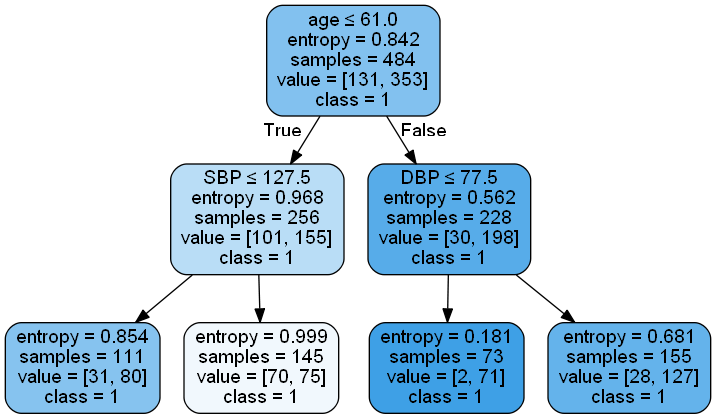

In [8]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf_entropy, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree_stroke.png')
Image(graph.create_png())
